<a href="https://colab.research.google.com/github/jyj0607040607/AIStudy24/blob/master/LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM 과 GRU 셀 :

*  순한 신경망에서 빼 놓은 놓을 수 없는 핵심 기술

*  전에 배웠던 SimpleRNN보다 훨씬 복잡하지만 성능이 뛰어나기 때문에 순한 신경망에 많이 채택 된다.
*  일반적으로 기본 순환층은 긴 시퀀스를 학습하기 어렵다.
*  시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석 된다.
*  멀리 떨어져 있는 단어 단어 정보를 인식하는데 어려울수 있다.
*  그래서 LSTM과 GRU를 사용한다.

LSTM(Long Short-Term Memory)는 말 그대로 단기 기억을 오래 기억하기 위해서 고안된다.

*  기본 개념은 동일하다.

*  --> 입력과 가중치를 곱하고 절편을 더해 활성함수를 통과시키는 구조를 여러개 가진다.

1.  은닉상태를 만든다.
*   입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과 시켜 다음 은닉 상태를 만든다.

*  이때  기본 순환층과는 달리 스그모이드 활성화 함수를 사용한다.
*  또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만든다.

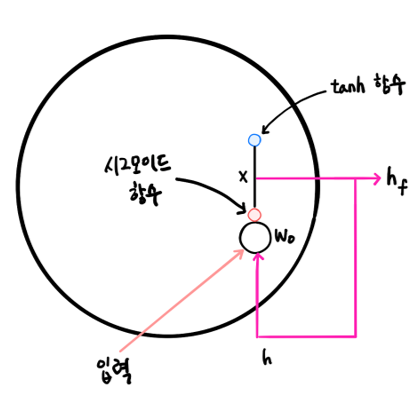

위 그림은 가중치 w_x와 w_h를 통틀어 w_o라고 표시한다.

*  파란색 원인 tanh 함수, 주황색 원은 스그모이드 함수이다.
*  x는 곱셈을 나타내고 있다.
*  --> 기본 순환층과 크게 다르지 않는다.

tanh 함수를 통과하는 값은???

*  LSTM에는 순환되는 상태가 2개이다. (은닉 상태, 셀상태)
*  은닉상태와 달리 셀 상태는 다음 층으로 전달되지 않고, LSTM 셀에서 순환만 되는 값이다.

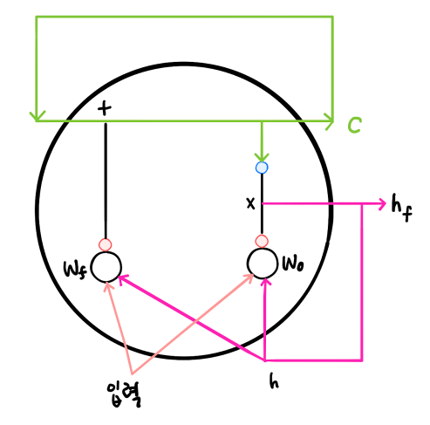

위 그림의 녹색은 순환되는 셀의 상태이다.
*  셀 상태를 은닉 상태 h와 구분하여 c로 표시한다.

셀 상태를 계산하는 과정

*  먼저 입력과 은닉 상태를 또 가중치 W_f에 곱한 다음 시그모이드 함수를 통과한다.
*  그 다음 이전 타임스텝의 셀 상태와 곱하여 새로운 셀의 상태를 만든다.
*  이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 은닉 상태를 만드는데 기여한다.
*  LSTM은 마치 작은 셀을 여러개 포함하고 있는 큰 셀 같다.
*  중요한 것은 입력과 은닉 상태에서 곱해지는 가중치 w_o와 w_f가 다르다.
*  --> 이 두 작은 셀은 각기 다른 기능을 위해 훈련된다.

*  여기에 2개의 작은 셀이 더 추가되어 셀의 상태를 만드는데 기여한다.

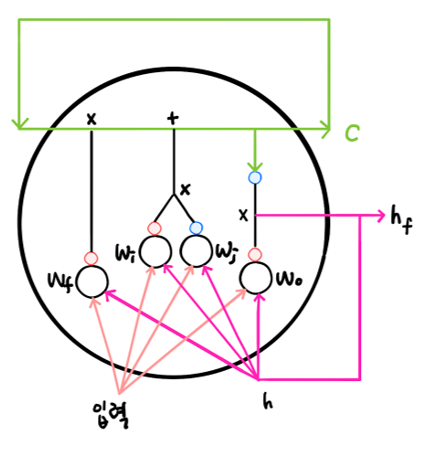

위 그림을 보면 이전과 마찬가지로 입력과 은닉 상태를 각기 다른 가중치에 곱한 다음, 하나의 시그모이드 함수를 통과한다.

*  다른 하나는 tanh 함수를 통과 시킨다.
*  그 다음 두 결과를 곱한 후 이전 셀의 상태와 더한다.
*  --> 최종 상태의 셀의 셀이다.

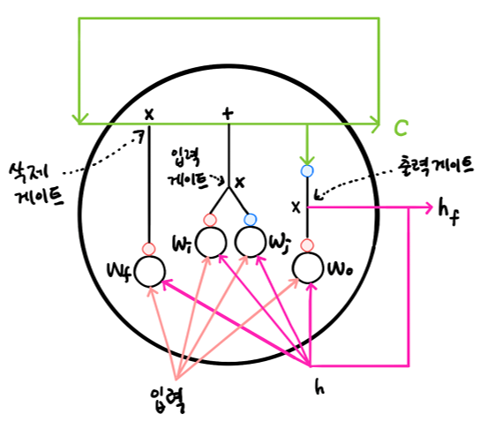

세군데 곱셈을 삭제 게이트, 입력 게이트, 출력 게이트라고 부른다.

*  삭제 게이트는 셀의 상태에 있는 정보를 제거하는 역할이다.
*  입력 게이트는 새로운 정보를 셀 상태에 추가한다.
*  출력 게이트를 통해 이 셀 상태가 다음 은닉 상태로 출력한다.

위의 처리는 케라스의 LSTM 클래스가 알아서 돌린다.

LSTM 신경망 훈련하기

*  실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

from tensorflow.keras.datasets import imdb # LSTM 신경망 훈련하기
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
  num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 케라스의 pad_sequences()함수로 각 샘플의 길이를 100에 맞추고 부족할 때 패딩을 추가함.
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [7]:
# LSTM 셀을 사용한 순환층을 만들어 보자 ( 예전에 썻던 SimpleRNN 클래스를 LSTM으로 변경만 하면 된다.)
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()
# SimpleRNN 클래스의 모델 파라미터 개수는 200개 였다.
# LSTM 셀에는 작은 셀이 4개 있으므로 정확히 800 이다.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 컴파일 하고 훈련시작

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
# 배치 크기는 64개 , 에포크 회수는 100으로 지정
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # 체크포인트, 조기종료 동일

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.5143 - loss: 0.6929 - val_accuracy: 0.5538 - val_loss: 0.6919
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.5663 - loss: 0.6914 - val_accuracy: 0.5886 - val_loss: 0.6899
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.5979 - loss: 0.6889 - val_accuracy: 0.6202 - val_loss: 0.6854
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.6318 - loss: 0.6826 - val_accuracy: 0.6664 - val_loss: 0.6701
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.6843 - loss: 0.6549 - val_accuracy: 0.7140 - val_loss: 0.5909
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.7153 - loss: 0.5820 - val_accuracy: 0.7320 - val_loss: 0.5582
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7380 - loss: 0.5496 - val_accuracy: 0.7482 - val_loss: 0.5331
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.7578 - loss: 0

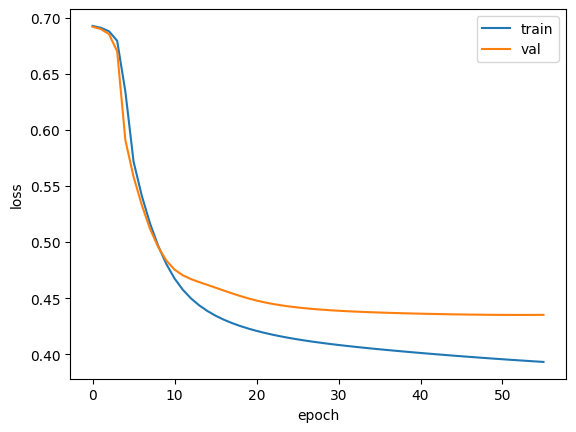

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

결과를 보면 기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행하는 것처럼 보인다.

*  하지만 경우에 따라서 과대 적합을 더 강하게 제어할 필요가 있다.
*  드롭아웃

완전 연결 신경망과 합성곱 신경망에서는 Dropout 클래스를 사용해서 드롭아웃을 적용 하였었다.

*  이를 통해 모델이 훈련세트에 너무 과대적합 되는 것을 막았었다.

순환층은 자체적으로 드롭아웃 기능을 제공한다.
*  드롭아웃 : 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는다.

SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있다.

*  dropout은 셀의 입력에 드롭아웃을 적용, recurrent_dropout은 순환 은닉 상태에 드롭아웃을 적용한다.
*  recurrent_dropout을 사용하면 GPU를 사용하여 모델을 훈련하지 못한다.

*  --> 모델의 훈련 속도가 크게 느려진다.

그래서 이번에는 dropout만 적용해볼것

In [15]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model2.add(keras.layers.LSTM(8, dropout=0.3)) # 드롭아웃 매개값 0.3으로 지정 (30% 입력의 드롭아웃)
model2.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.5089 - loss: 0.6930 - val_accuracy: 0.5496 - val_loss: 0.6925
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.5447 - loss: 0.6924 - val_accuracy: 0.5780 - val_loss: 0.6919
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.5575 - loss: 0.6916 - val_accuracy: 0.5914 - val_loss: 0.6908
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.5756 - loss: 0.6903 - val_accuracy: 0.6078 - val_loss: 0.6889
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.5946 - loss: 0.6880 - val_accuracy: 0.6228 - val_loss: 0.6854
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 0.6161 - loss: 0.6837 - val_accuracy: 0.6366 - val_loss: 0.6779
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 45ms/step - accuracy: 0.6438 - loss: 0.6733 - val_accuracy: 0.6756 - val_loss: 0.6553
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.6754 - loss: 0

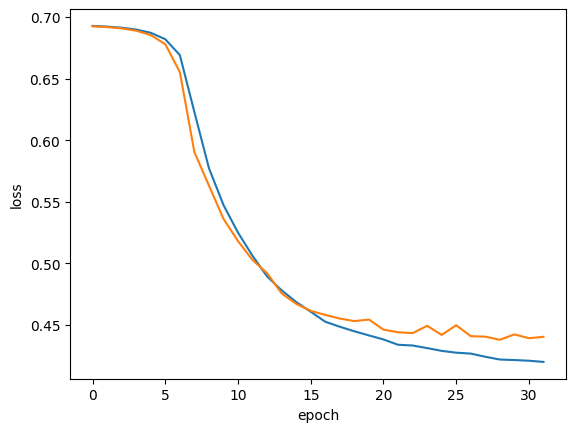

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
#  훈련 손실과 검증손실 차이가 좁혀진 것을 확인 할 수 있다

2개의 층 연결학

*  순환층을 연결할 때는 한가지 주의할 점이 있는데 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음층으로 전달된다.
*  하지만 순층을 쌓게 되면 모든 순환층에 순차 데이터가 필요하다.
*  앞쪽의 순환층이 모든 타임스텝에 대한 응ㄴ닉상태를 출력해야된다.
*  오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력해야한다.

-->  처음에 본 그림

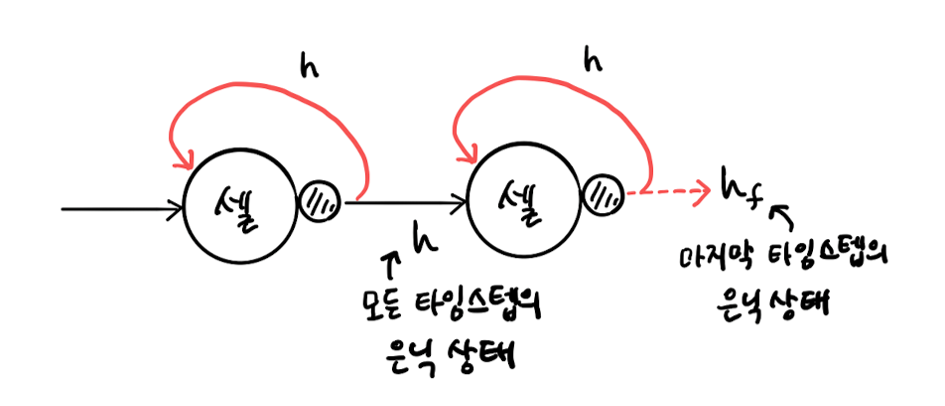

In [23]:
# 케라스의 순환층에서 모든 스텝의 은닉 상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 retuences = True로 지정한다.
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))    # 1번 LSTM
model3.add(keras.layers.LSTM(8, dropout=0.3))                        # 2번 LSTM
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()
# 첫번째 LSTM 층이 모든 타임스텝(100개)의 은닉상태를 출력하기 때문에 출력 크기가(None, 100, 8)로 표시됨
# 이에 반해 두 번째 LSTM층의 출력 크기는 마지막 타임 스텝의 은닉상태만 출력 하기 때문에 (None, 8)이다.)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from subprocess import call
# 훈련시작
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

histoty = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.5114 - val_loss: 0.6928
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.5301 - loss: 0.6928 - val_accuracy: 0.5532 - val_loss: 0.6922
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.5558 - loss: 0.6919 - val_accuracy: 0.6098 - val_loss: 0.6903
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.5991 - loss: 0.6891 - val_accuracy: 0.6348 - val_loss: 0.6841
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.6294 - loss: 0.6797 - val_accuracy: 0.6814 - val_loss: 0.6547
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.6757 - loss: 0.6376 - val_accuracy: 0.7150 - val_loss: 0.5801
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.7112 - loss: 0.5809 - val_accuracy: 0.7364 - val_loss: 0.5461
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - accuracy: 0.7359 - loss: 0

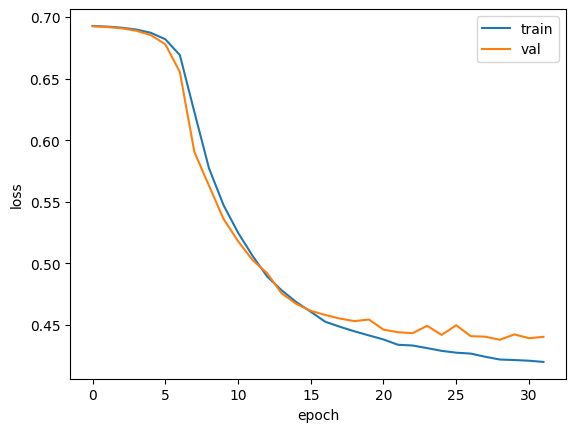

In [26]:
# 과대 적합이 잘 제어 되었는지 확인 해보자
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 그래프를 보면 과대 적합을 제어하면서 솔실을 최대한 낮춘것 같다.

GRU(Gated Recurrent Units) 구조
 *  뉴욕 대학교 조경현 교수가 발명한 셀로 유명하다.
 *  --> LSTM을 간소한 버전으로 만든다,
 *  셀 상태를 계산하지 않고 은닉상태만 포함하고 있다.



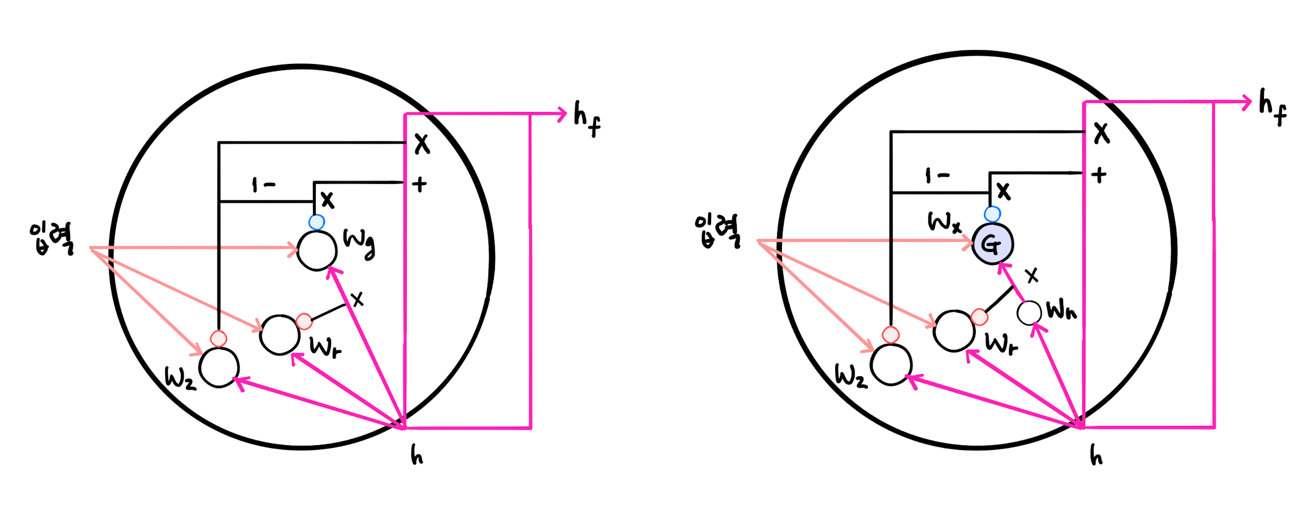

GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어있다.

2개는 시그모이드 활성화함수를 사용하고 하나는 tanh 활성화 함수를 사용한다.

여기에도 은닉 상태와 곱해지는 가중치를 합쳐서 나타낸다.

*  맨 왼쪽 w_z를 사용하는 셀의 출력이 은닉 상태에서 바로 곱해져 삭제 게이트 역할을 수행한다.

*  이와 똑같은 출력은 1에서 뺸 다음에 가장 오른쪽 w_g를 사용하는 셀의 출력에 곱한다.

*  이는 입력되는 정보를 제어하는 역할을 수행한다.

*  가운데 w_r을 사용하는 셀에서는 출력된 w_g 셀이 사용할 은닉 상태의 정보를 제어한다.

GRU은 LSTM 보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지 않는 좋은 성능을 낸다.

In [27]:
# GRU 신경망 훈련하기

model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model4.add(keras.layers.GRU(8))   # GRU로 변경한다.
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

*  파라미터를 계산해보면 GRU 셀에는 3개의 작은 셀이 있다.

*  작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있다.

*  입력에 곱하는 가중치는 16 * 8 = 128개이고, 은닉 상태에 곱하는 가중치는 8 * 8 = 64이다.

*  절편은 뉴런마다 하나씩이므로 8개이다.
*  은닉 상태에 곱하는 가중치는 8 * 8 = 64 이다.

*  절편은 뉴런마다 한나씩이므로 8개이다.
*  모두 더하면 128 * 64 + 8 = 200 이런 작은 셀이 3개 이므로 600개이다.

624개가 된 이유는 3개의 절편마다 8개의 뉴런까지 존재하기 때문에 3 * 8 = 24 까지 더해진다.

텐서플로가 이런 계산 방식을 사용하는 이유는 GPU를 잘 활용하기 위해서 임 (LSTM 개선점)

In [28]:
# 훈련시작

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5298 - loss: 0.6925 - val_accuracy: 0.5538 - val_loss: 0.6915
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.5691 - loss: 0.6910 - val_accuracy: 0.5770 - val_loss: 0.6895
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.5852 - loss: 0.6887 - val_accuracy: 0.5868 - val_loss: 0.6864
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.6015 - loss: 0.6849 - val_accuracy: 0.6096 - val_loss: 0.6811
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.6153 - loss: 0.6788 - val_accuracy: 0.6278 - val_loss: 0.6723
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.6325 - loss: 0.6682 - val_accuracy: 0.6462 - val_loss: 0.6560
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.6594 - loss: 0.6481 - val_accuracy: 0.6822 - val_loss: 0.6197
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.7012 - loss: 0

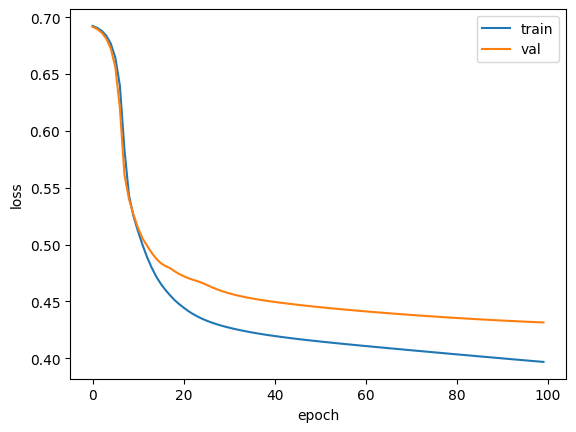

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.keras')

rnn_model.evaluate(test_seq, test_target)
# 테스트 성능 계산 해보자

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.7971 - loss: 0.4387


[0.4394247531890869, 0.7974399924278259]

In [34]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.keras')

rnn_model.evaluate(test_seq, test_target)
# 테스트 성능 계산 해보자

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7971 - loss: 0.4387


[0.4394247531890869, 0.7974399924278259]